In [1]:
# Load the trained model
from transformers import SegformerForSemanticSegmentation

id2label = {0: 'Non-Forest', 
            1: 'Forest',
            255: 'NoData'}
label2id = {'Non-Forest' : 0, 
            'Forest': 1,
            'NoData':255}

tranined_model = SegformerForSemanticSegmentation.from_pretrained('./model/', num_labels=3)
tranined_model.eval()  # Set the model to evaluation mode

SegformerForSemanticSegmentation(
  (segformer): SegformerModel(
    (encoder): SegformerEncoder(
      (patch_embeddings): ModuleList(
        (0): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(3, 32, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
          (layer_norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        )
        (1): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
        (2): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(64, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((160,), eps=1e-05, elementwise_affine=True)
        )
        (3): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(160, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  

In [3]:
import os
import numpy as np
from PIL import Image
from torch.utils.data import Dataset
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

class SemanticSegmentationDataset(Dataset):
    """Image (semantic) segmentation dataset."""

    def __init__(self, root_dir, mode="train"):
        """
        Args:
            root_dir (string): Root directory of the dataset containing the images + annotations.
            feature_extractor (SegFormerFeatureExtractor): feature extractor to prepare images + segmentation maps.
            mode: Whether to load "training" or "validation" images + annotations.
        """
        self.root_dir = root_dir
        #self.feature_extractor = feature_extractor
        self.mode = mode
        self.transforms = self.create_transforms()
        
        #sub_path = "training" if self.train else "validation"
        self.img_dir = os.path.join(self.root_dir, "input", self.mode)
        self.ann_dir = os.path.join(self.root_dir, "target", self.mode)
        self.images = sorted([f for _, _, files in os.walk(self.img_dir) for f in files])
        self.annotations = sorted([f for _, _, files in os.walk(self.ann_dir) for f in files])
        
    def create_transforms(self):
        _transforms = A.Compose([
            # A.PadIfNeeded(min_height=256, min_width=256, border_mode=0, value=0, mask_value=255),
            A.Resize(height=256, width=256), 
            ToTensorV2(),
#             A.Normalize([0.485, 0.456, 0.406, 0], [0.229, 0.224, 0.225, 1])
        ], p = 1,
        )
        return _transforms
    
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = np.array(Image.open(os.path.join(self.img_dir, self.images[idx])).convert('RGB'))
        transformed = self.transforms(image=image)
        transformed_image = transformed["image"]

        mask  = np.array(Image.open(os.path.join(self.ann_dir, self.annotations[idx])).convert('L'))
        mask[mask > 1] = 255 #change all non-valid label value to 255

        return {"image": transformed_image, "mask": mask}

In [4]:
from torch.utils.data import DataLoader

data_dir = './HistForestMapping/'

test_dataset = SemanticSegmentationDataset(root_dir=data_dir,mode="test")
test_dataloader = DataLoader(test_dataset, batch_size=1)

print(len(test_dataset))

602


/var/folders/n0/gs1g7p590qg7trf8pp8w29ch0000gn/T/ipykernel_2177/1843854048.py:10: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("mean_iou")


[3, 491, 378, 402, 379, 420, 281, 462, 101, 497]


/Users/alain/.cache/huggingface/modules/datasets_modules/metrics/mean_iou/927b58f57da3f4b6e385e47d8a4b3947ee3f7cfcdba9b9359eba2ada2ed6b951/mean_iou.py:258: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
/Users/alain/.cache/huggingface/modules/datasets_modules/metrics/mean_iou/927b58f57da3f4b6e385e47d8a4b3947ee3f7cfcdba9b9359eba2ada2ed6b951/mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label


Loss: 0.00022920947230886668
Forest Mean IoU: nan
Non-Forest Mean IoU: 1.0
Overall Mean accuracy: 1.0


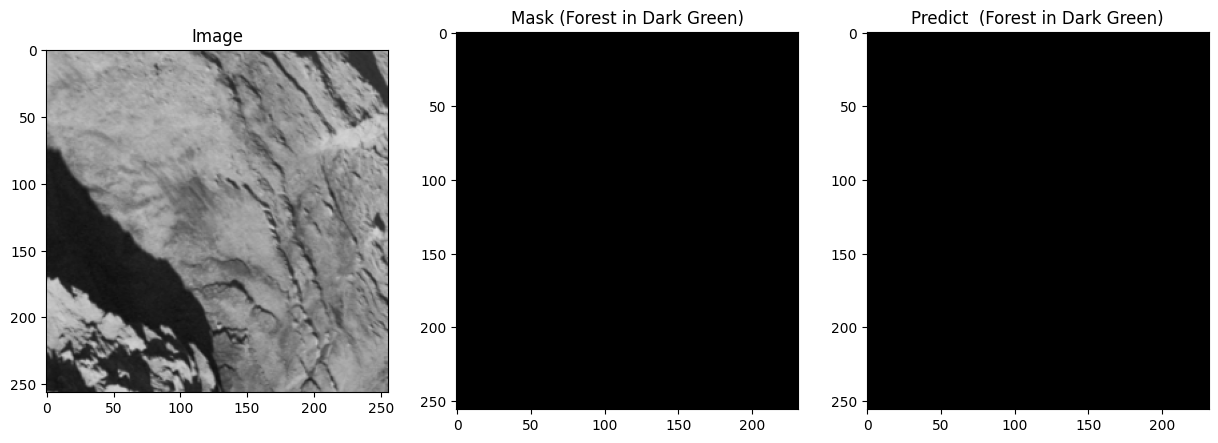



Loss: 0.0943775475025177
Forest Mean IoU: 0.9583618097320941
Non-Forest Mean IoU: 0.7154367118169079
Overall Mean accuracy: 0.8607503822773084


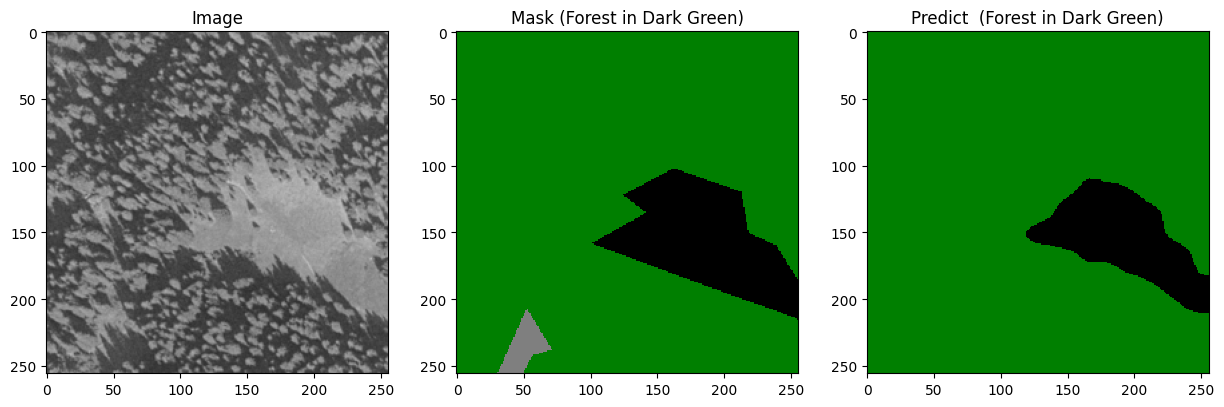



Loss: 0.35202497243881226
Forest Mean IoU: 0.6722343775014675
Non-Forest Mean IoU: 0.7037858693031107
Overall Mean accuracy: 0.8479092435818332


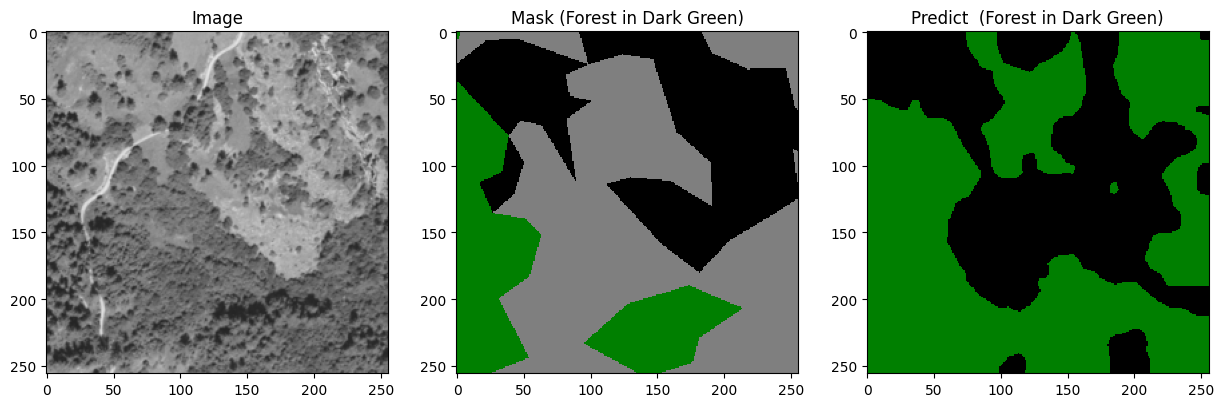



Loss: 0.006427583750337362
Forest Mean IoU: 0.9985055363086747
Non-Forest Mean IoU: 0.0
Overall Mean accuracy: 0.5


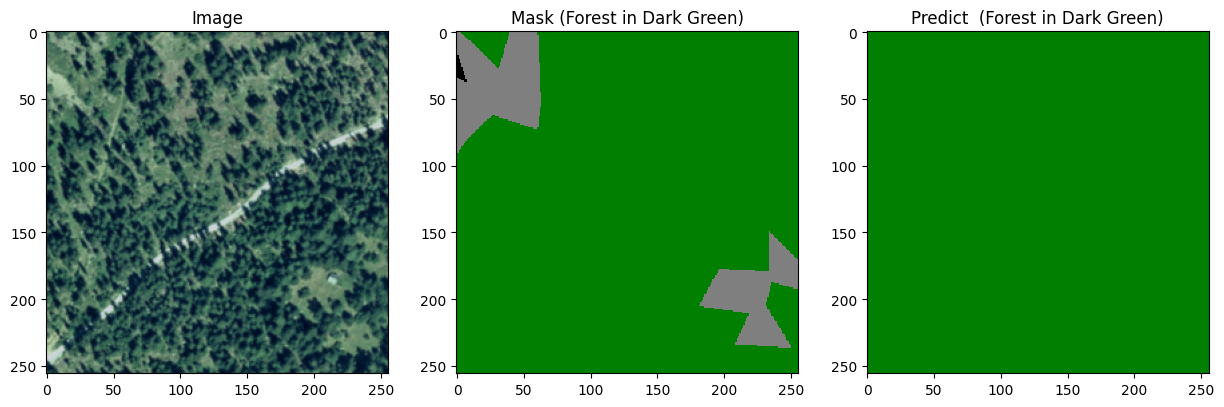



Loss: 0.10744719952344894
Forest Mean IoU: 0.8987527789291232
Non-Forest Mean IoU: 0.9236691097096756
Overall Mean accuracy: 0.9607609872201045


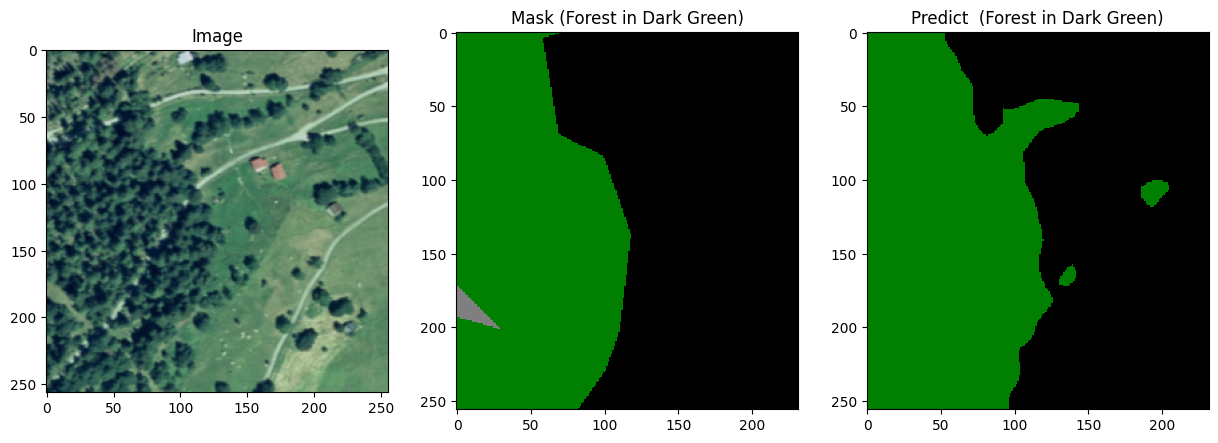



Loss: 0.08649622648954391
Forest Mean IoU: 0.9334752237502729
Non-Forest Mean IoU: 0.9136043091534073
Overall Mean accuracy: 0.9616791972397046


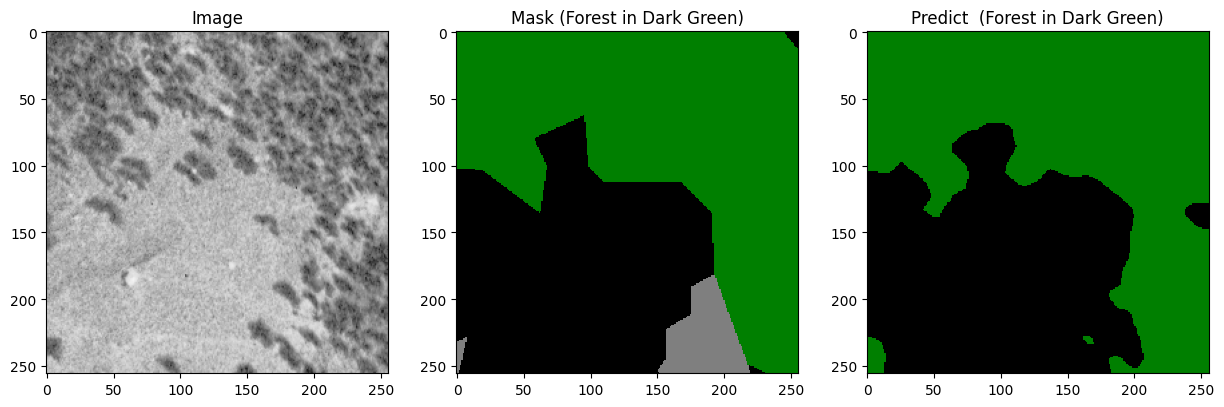



Loss: 0.00022861581237521023
Forest Mean IoU: nan
Non-Forest Mean IoU: 1.0
Overall Mean accuracy: 1.0


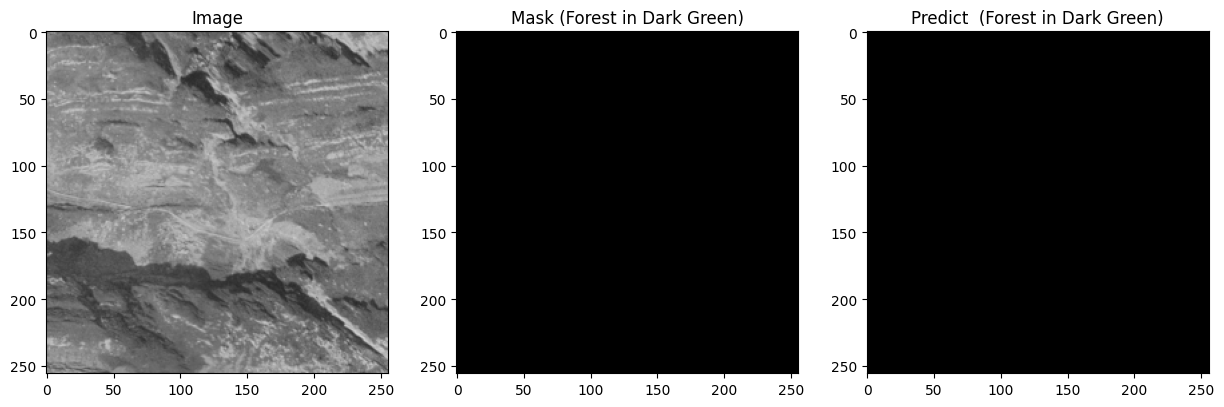



Loss: 0.0006011419463902712
Forest Mean IoU: nan
Non-Forest Mean IoU: 1.0
Overall Mean accuracy: 1.0


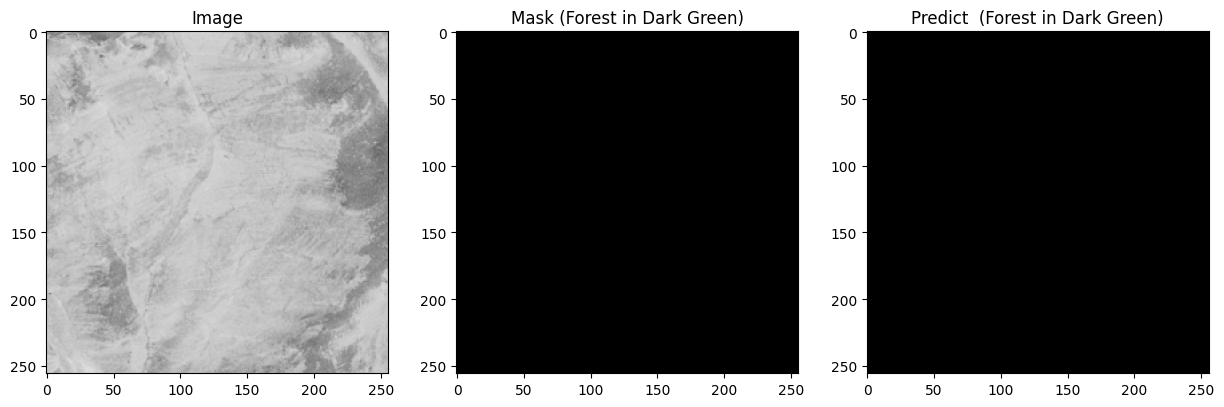



Loss: 0.09599732607603073
Forest Mean IoU: 0.9576205886885498
Non-Forest Mean IoU: 0.7695714627723247
Overall Mean accuracy: 0.9063279088100458


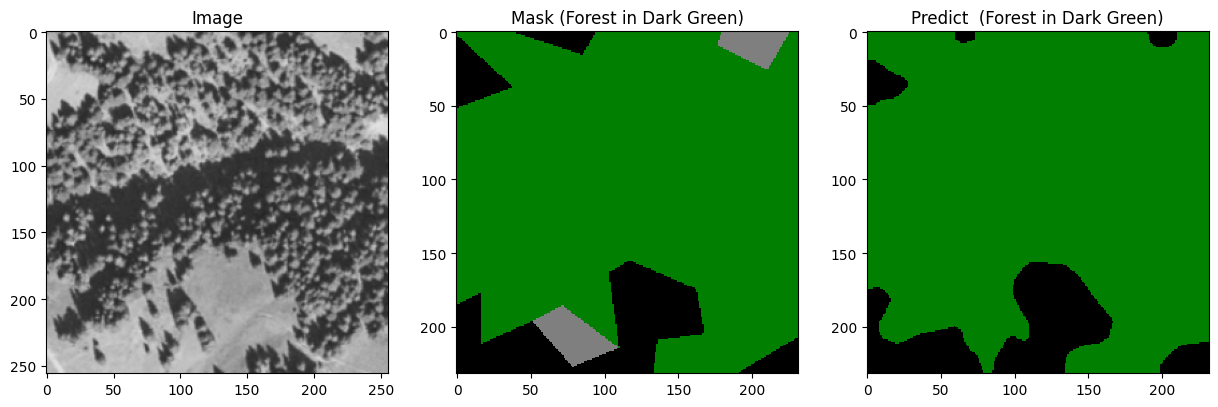



Loss: 0.04538115859031677
Forest Mean IoU: 0.9806504821519202
Non-Forest Mean IoU: 0.3130630630630631
Overall Mean accuracy: 0.6665335902369702


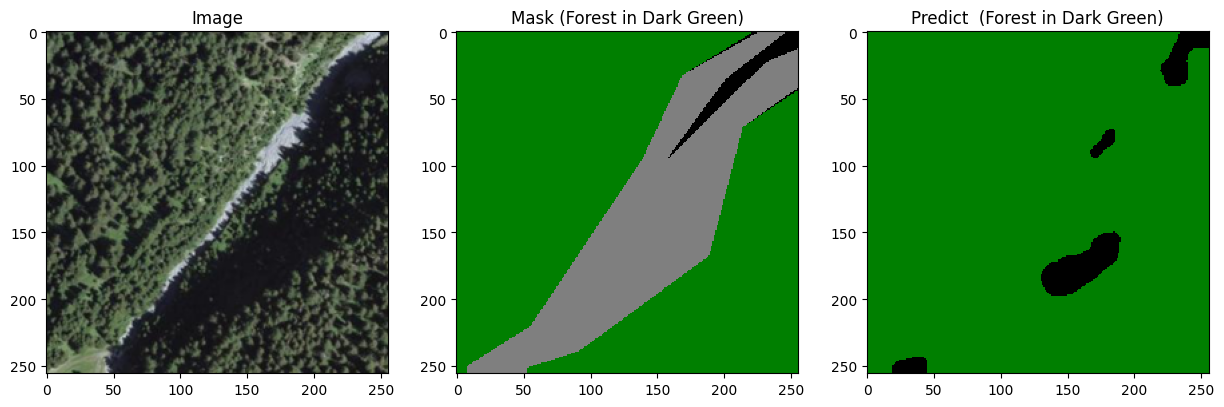

In [5]:
"TEST ON 10 RANDOM TEST DATASET"
import torch
import random
from torch import nn
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import accuracy_score
from datasets import load_metric

metric = load_metric("mean_iou")


def show_sample(image, mask, predicts):
    colors = [(0, 0, 0), (0, 0.5, 0), (0.5, 0.5, 0.5)]
    n_bins = [3]  # Discretizes the interpolation into bins
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors, N=3)
    # Adjust mask for 'NoData' to be white or transparent
    mask_display = np.copy(mask)
    mask_display[mask == 255] = 2  # 2 corresponds to grey in the custom colormap
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Image")
    plt.subplot(1, 3, 2)
    plt.imshow(mask_display, cmap=cmap, interpolation='nearest', vmin=0, vmax=2)
    plt.title("Mask (Forest in Dark Green)")
    plt.subplot(1, 3, 3)
    plt.imshow(predicts, cmap=cmap, interpolation='nearest', vmin=0, vmax=2)
    plt.title("Predict  (Forest in Dark Green)")
    plt.show()

random_indices = random.sample(range(len(test_dataset)), 10)
print(random_indices)

for idx, batch in enumerate(test_dataloader):
    if idx in random_indices:
        # get the inputs;
        pixel_values = batch["image"].float()
        labels = batch["mask"].long()

        outputs = tranined_model(pixel_values=pixel_values, labels=labels)
        loss, logits = outputs.loss, outputs.logits

        # evaluate
        with torch.no_grad():
            upsampled_logits = nn.functional.interpolate(logits, size=labels.shape[-2:], mode="bilinear", align_corners=False)
            predicted = upsampled_logits.argmax(dim=1)
            # note that the metric expects predictions + labels as numpy arrays
            metric.add_batch(predictions=predicted.detach().cpu().numpy(), references=labels.detach().cpu().numpy())

        # let's print loss and metrics every 100 batches
        metrics = metric._compute(references = labels.cpu(), 
                                  predictions = predicted.cpu(),
                                  num_labels=len(id2label), 
                                  ignore_index=255,
                                  reduce_labels=False, # we've already reduced the labels before)
        )
        non_forest_iou = metrics["per_category_iou"][0]
        forest_iou = metrics["per_category_iou"][1]
        # Print loss and metrics for each class
        print("Loss:", loss.item())
        print("Forest Mean IoU:", forest_iou)
        print("Non-Forest Mean IoU:", non_forest_iou)
        print("Overall Mean accuracy:", metrics["mean_accuracy"])

        
        pixel_values =  batch["image"].squeeze(0).permute(1, 2, 0)
        labels =  batch["mask"].squeeze(0)
        predicted = predicted.squeeze(0)

        pixel_values = pixel_values.to('cpu').numpy()
        labels = labels.to('cpu').numpy()
        predicted = predicted.to('cpu').numpy()
        show_sample(pixel_values, labels, predicted)
        print('\n')

In [7]:
overall_non_forest_iou=[]
overall_forest_iou=[]
overall_mean_iou=[]
overall_accuracy=[]

for idx, batch in enumerate(test_dataloader):
    # get the inputs;
    pixel_values = batch["image"].float()
    labels = batch["mask"].long()

    outputs = tranined_model(pixel_values=pixel_values, labels=labels)
    loss, logits = outputs.loss, outputs.logits

    # evaluate
    with torch.no_grad():
        upsampled_logits = nn.functional.interpolate(logits, size=labels.shape[-2:], mode="bilinear", align_corners=False)
        predicted = upsampled_logits.argmax(dim=1)
        # note that the metric expects predictions + labels as numpy arrays
        metric.add_batch(predictions=predicted.detach().cpu().numpy(), references=labels.detach().cpu().numpy())

    # let's print loss and metrics every 100 batches
    metrics = metric._compute(references = labels.cpu(), 
                              predictions = predicted.cpu(),
                              num_labels=len(id2label), 
                              ignore_index=255,
                              reduce_labels=False, # we've already reduced the labels before)
    )
    
    non_forest_iou = metrics["per_category_iou"][0]
    forest_iou = metrics["per_category_iou"][1]
    mean_iou = metrics["mean_iou"]
    # print(forest_iou)
    mean_accuracy = metrics["mean_accuracy"]

    # Print loss and metrics for each class
    overall_non_forest_iou.append(non_forest_iou)
    overall_forest_iou.append(forest_iou)
    overall_mean_iou.append(mean_iou)
    overall_accuracy.append(mean_accuracy)
    

print("Overall Forest Mean IoU:", np.nanmean(overall_forest_iou))
print("Overall Non-Forest Mean IoU:", np.nanmean(overall_non_forest_iou))
print("Overall Mean IoU:", np.nanmean(overall_mean_iou))
print("Overall Accuracy:", np.nanmean(overall_accuracy))


Overall Forest Mean IoU: 0.6896100704339867
Overall Non-Forest Mean IoU: 0.8033752168322273
Overall Mean IoU: 0.8046186732358138
Overall Accuracy: 0.8830684716083655
